# Comprehensive Analysis of Netflix Content Dataset

## Objective:
*The objective of this project is to perform a comprehensive analysis of the Netflix content dataset to gain insights into the types, distribution, and trends of the content available on the platform. This includes examining content categories, geographical distribution, release trends, and popular directors and actors, ultimately providing valuable insights and recommendations for content strategy.*








### Step 1: Loading and Initial Exploration

In [2]:
# Importing liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1.1 Loading data set
df = pd.read_csv('netflix1.csv')

# Displaying first few rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# 1.2 Inatial data exploration

# # Display summary statistics of the dataset
df.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [5]:
# Displaying Inforamtion about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
# Checking for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Step 2: Data Cleaning and Preprocessing

In [7]:
# 2.1 Hanidling Missing values

# Fill missing 'director' and 'country' with 'Unknown'
df.fillna({'director':'Unknown'},inplace=True)
df.fillna({'country':"Unknown"},inplace=True)

# # Fill missing 'date_added' with a placeholder date (e.g., '1970-01-01') and convert to datetime
df.fillna({'date_added':'1970-01-01'},inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

# Fill missing 'rating' with 'Not Rated'
df.fillna({'rating':'Not Rated'},inplace=True)

df.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
# 2.2 Correcting Date Types
df['release_year'] = df['release_year'].astype('int')
# # Convert 'duration' to a numeric value (extracting the number of minutes or seasons
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [9]:
# 2.3 Additional Preprocessing Steps
# Extract the year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Few rows after data cleaning
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_num,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,2021


*By cleaning and preprocessing the data, we ensure that the dataset is ready for analysis. Next, we can proceed with descriptive analysis to gain initial insights from the data. If you have any specific requirements or further questions, please let me know!*








### Step 3: Descriptive Analysis

In [10]:
# 3.1 Content Distribution Analysis

# # Count the number of shows by type (Movie or TV Show)
show_count = df['type'].value_counts()
print("\n Count OF Shows by Type\n",show_count)


 Count OF Shows by Type
 type
Movie      6126
TV Show    2664
Name: count, dtype: int64


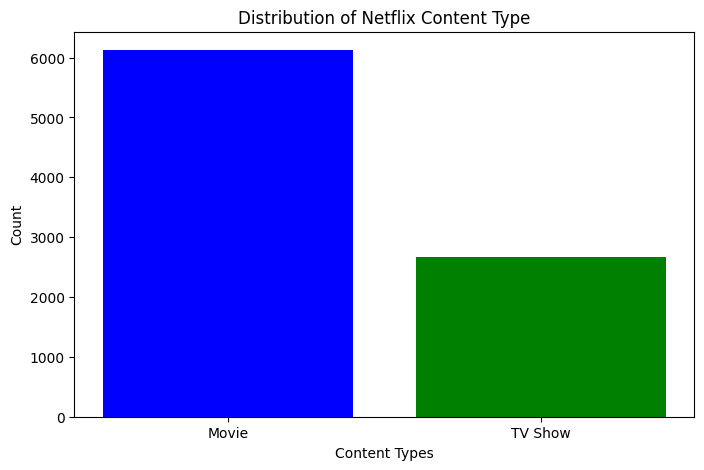

In [11]:
# Plotting the distribution of content types
plt.figure(figsize=(8,5))
plt.bar(show_count.index,show_count.values,color=['blue','green'] )
plt.title("Distribution of Netflix Content Type")
plt.xlabel("Content Types")
plt.ylabel('Count')
plt.show()


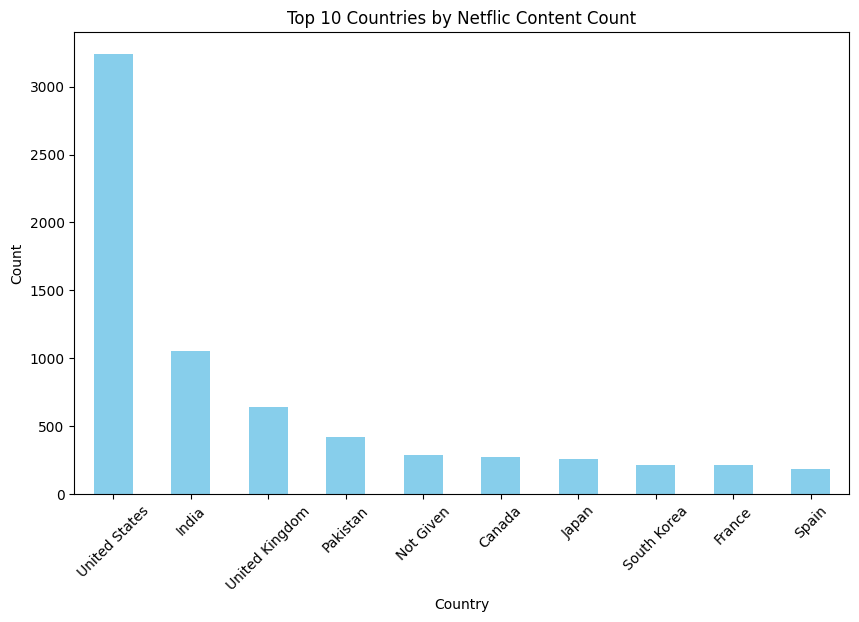

In [12]:
# 3.2 Analysis of Content by Country and Director
county_count = df['country'].value_counts().head(10)

# Plotting the top countries by content count
plt.figure(figsize=(10,6))
county_count.plot(kind='bar',color = 'skyblue')
plt.title('Top 10 Countries by Netflic Content Count')
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

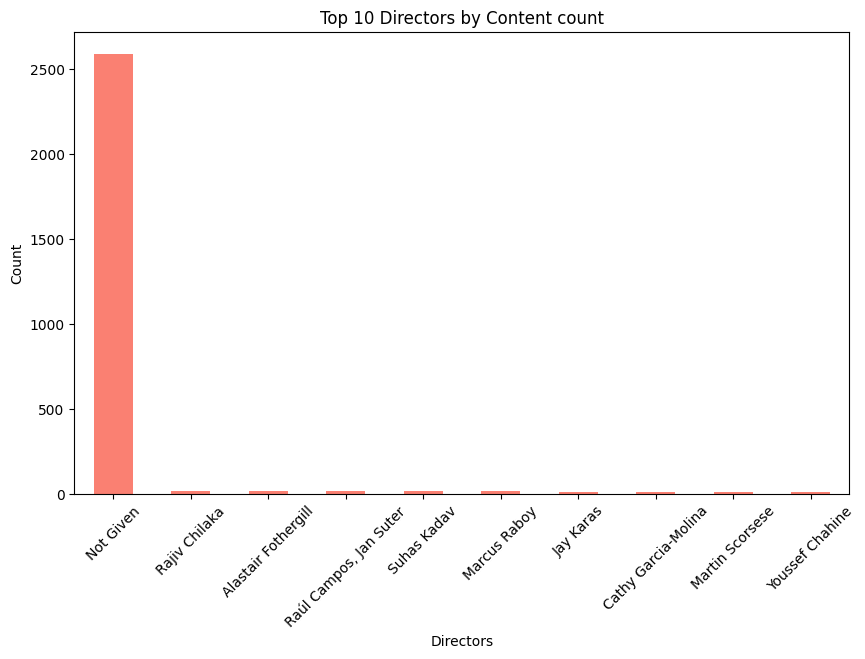

In [13]:
# Top 10 directors by content count
directors_count = df['director'].value_counts().head(10)

# Top 10 directors by content count
plt.figure(figsize=(10,6))
bars= directors_count.plot(kind='bar',color='salmon')
plt.title('Top 10 Directors by Content count')
plt.xlabel("Directors")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

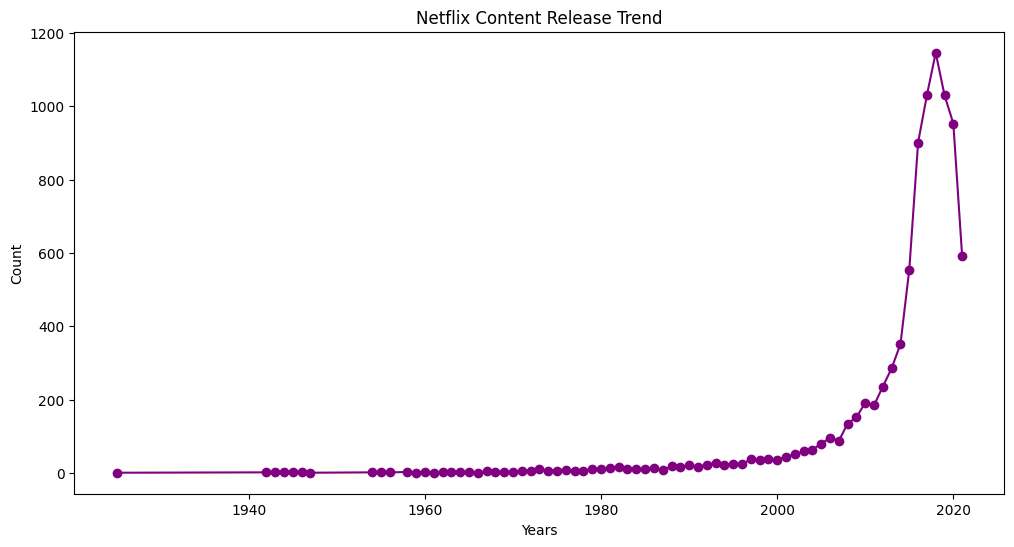

In [14]:
#3.3 Release Year Trends
realse_count = df['release_year'].value_counts().sort_index()

# Plotting the release trends
plt.figure(figsize=(12, 6))
realse_count.plot(kind='line',marker='o',color='purple')
plt.title("Netflix Content Release Trend")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

* Conlusion :
From Step 3, we conclude that Netflix's content is predominantly movies, with significant contributions from countries like the United States, India, and the UK. The top 10 directors, such as Raoul Peck and Marcus Raboy, have similar content counts, indicating diverse contributions. Additionally, there is a clear trend of increasing content releases over recent years, reflecting Netflix's ongoing expansion and investment in its content library.*

### Step 4: Genre Analysis

In [15]:
# 4.1 Extracting and Counting Genres
df['genre_list'] = df['listed_in'].str.split(',')
# Explode the genre list to count each genre separately
explode_gener = df.explode('genre_list')
# Count the occurrences of each genre
gener_count = explode_gener['genre_list'].value_counts()
# Display top 10 rows
top_geners = gener_count.head(10)
top_geners

genre_list
 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

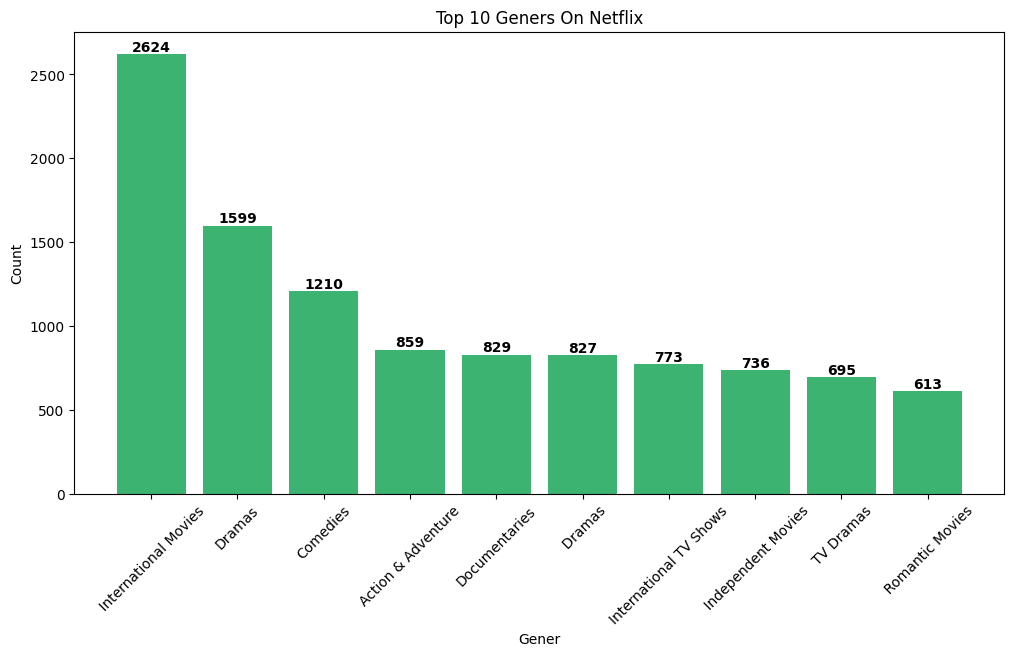

In [16]:
# 4.2 Visualizing Genre Distribution
plt.figure(figsize=(12,6))
bars = plt.bar(top_geners.index,top_geners.values,color='mediumseagreen')
plt.title("Top 10 Geners On Netflix")
plt.xlabel("Gener")
plt.ylabel('Count')
plt.xticks(rotation = 45)
# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 1, str(int(height)), ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

* Coclusion:
From Step 4, we conclude that the most prevalent genres on Netflix include International Movies, Dramas, and Comedies. This distribution highlights Netflix's diverse content library, catering to a wide range of viewer interests.*

### Step 5: Content Duration Analysis

In [127]:
# # Separate the movies and TV shows
movies_df = df[df['type']== 'Movie'].copy()
# Extract duration for movies
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)



In [134]:
# Filter for TV shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [135]:
# Function to extract number of seasons
def extract_seasons(duration_str):
    try:
        # Split the string by space and take the first element (number of seasons)
        seasons_str = duration_str.split()[0]
        # Convert to integer
        seasons = int(seasons_str)
        return seasons
    except:
        return None

In [136]:
# Apply extraction function to duration column
tv_shows_df['duration_num'] = tv_shows_df['duration'].apply(extract_seasons)

In [137]:
# Drop rows with NaN values in the duration_num column
tv_shows_df = tv_shows_df.dropna(subset=['duration_num'])

In [138]:
print("\nUnique values in the 'duration_num' column for TV shows:")
print(tv_shows_df['duration_num'].unique())



Unique values in the 'duration_num' column for TV shows:
[ 1  9  2  4  6  3  5  7  8 15 10 17 13 12 11]


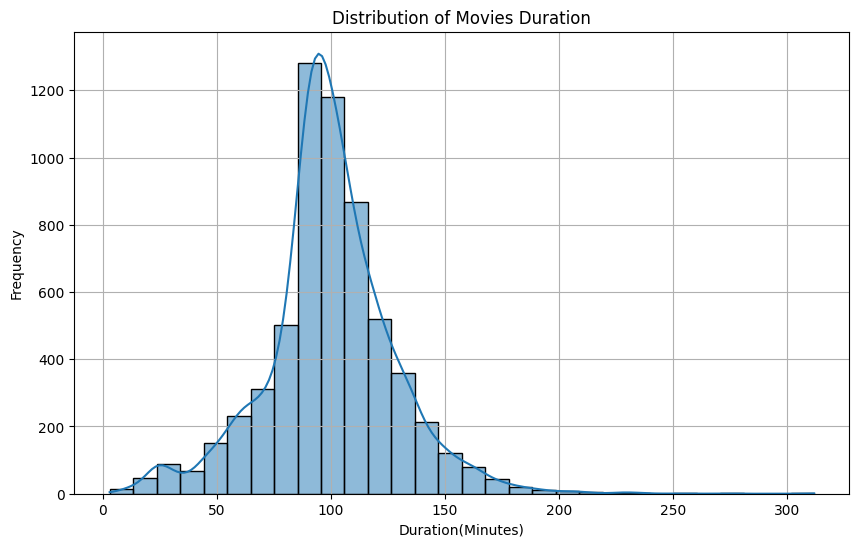

In [128]:
# 5.2 Visualizing Content Duration for Movies
plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration'],kde=True,bins=30)
plt.title("Distribution of Movies Duration")
plt.xlabel("Duration(Minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

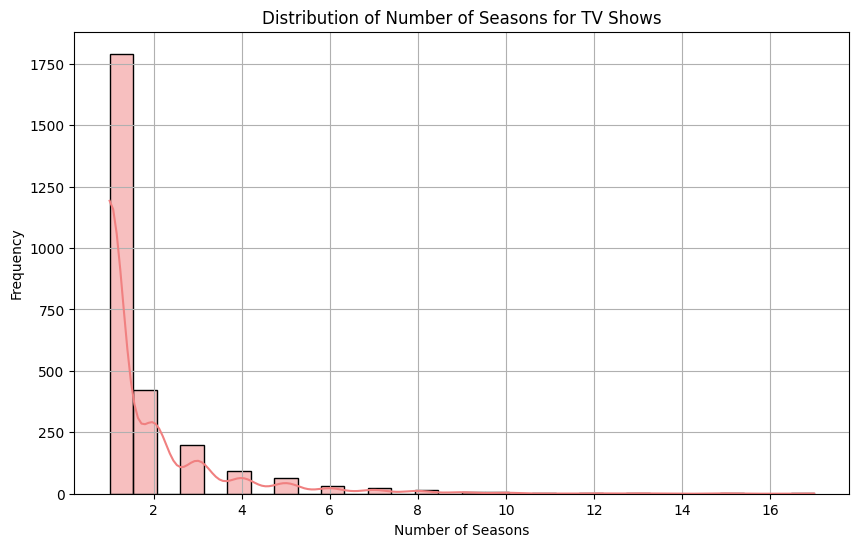

In [146]:
# 5.3 Visualizing Content Duration for TV Shows
# Plot the distribution of number of seasons for TV shows
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows_df['duration_num'], kde=True, bins=30,color='lightcoral',edgecolor='black')
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


* Conclusion:
The distribution plot of duration_num revealed a diverse range of TV show lengths on Netflix, reflecting varied viewer preferences for season counts.*

# Conclusion
*Through analysis of Netflix data, key insights into content popularity, viewer engagement trends, and strategic opportunities for content curation and user experience enhancement were identified, informing future content strategies and viewer engagement initiatives."*








